
#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2025**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

In [ ]:
pd.set_option('display.width', 1000)       # Sin límite de ancho
#pd.set_option('display.max_columns', None) # Mostrar todas las columnas

## Lectura del dataset

In [ ]:
#Importamos la data y la almacenamos en un DataFrame de Pandas
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2025_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:10]
#Cuales son las columnas que tiene el DataFrame?
print(df.columns)

Index(['Unnamed: 0', 'work_province', 'work_dedication', 'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus', 'salary_bonus_tied_to', 'salary_inflation_adjustment', 'salary_percentage_inflation_adjustment', 'salary_month_last_inflation_adjustment', 'salary_comparison_last_semester', 'salary_benefit', 'salary_satisfaction', 'estas_buscando_trabajo', 'pluriempleo', 'company_main_activity', 'profile_years_experience', 'work_years_in_company', 'work_years_in_current_position', 'work_people_in_charge_of', 'tools_platform', 'tools_programming_languages', 'tools_frameworks', 'tools_data_bases', 'tools_qa_testing', 'company_employee_number', 'work_work_modality', 'company_days_in_the_office', 'en_los_ultimos_6_mesesse_aplico_alguna_politica_de_ajustes_salariales', 'opcionalen_que_empresaorganizacion_estas_trabajando', 'company_recommended', 'tools_copilotchatgpt', 'algo_que_quieras_decir_sobre_tu_trabajo',
       

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 300000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 1000K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

## 1. Columnas Relevantes a Analizar

In [ ]:
df.columns

Index(['Unnamed: 0', 'work_province', 'work_dedication', 'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus', 'salary_bonus_tied_to', 'salary_inflation_adjustment', 'salary_percentage_inflation_adjustment', 'salary_month_last_inflation_adjustment', 'salary_comparison_last_semester', 'salary_benefit', 'salary_satisfaction', 'estas_buscando_trabajo', 'pluriempleo', 'company_main_activity', 'profile_years_experience', 'work_years_in_company', 'work_years_in_current_position', 'work_people_in_charge_of', 'tools_platform', 'tools_programming_languages', 'tools_frameworks', 'tools_data_bases', 'tools_qa_testing', 'company_employee_number', 'work_work_modality', 'company_days_in_the_office', 'en_los_ultimos_6_mesesse_aplico_alguna_politica_de_ajustes_salariales', 'opcionalen_que_empresaorganizacion_estas_trabajando', 'company_recommended', 'tools_copilotchatgpt', 'algo_que_quieras_decir_sobre_tu_trabajo',
       

Seleccionamos las siguientes columnas para responder a la pregunta realizada:

- 'tools_programming_languages': Que contiene información de los lenguajes utilizados por los encuestados
- 'salary_monthly_NETO': Contiene los ingresos mensuales "en mano" de los encuestados
- y 'work_dedication': Para filtrar entre encuestados cuyo que trabajan en programación a tiempo completo (full-time) y quienes no.

In [ ]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'work_dedication']

Debido a que la pregunta que deseamos responder en este punto es '¿ A qué lenguaje/s de programación corresponde un mejor salario?' decidimos tener en cuenta solo estas columnas dejando de lado otras que si bien podrían permitir sacar alguna conclusión relacionada a la satisfacción o calidad del empleo (como 'salary_benefit' o 'work_work_modality' o 'company_recommended') o tener una noción más amplia del salario (como 'salary_has_bonus' o 'salary_bonus_tied_to') para centrarnos más en la respuesta de la pregunta anteriormente mencionada.

In [ ]:
print(f"{df.salary_monthly_NETO.describe()}\n\n")
print(f"{df.tools_programming_languages.value_counts()}\n\n")
print(f"work_dedication:\n{df.work_dedication.value_counts()}")

count    4.951000e+03
mean     1.072550e+10
std      7.545122e+11
min      4.000000e+00
25%      1.288264e+06
50%      1.916958e+06
75%      2.893500e+06
max      5.309001e+13
Name: salary_monthly_NETO, dtype: float64


tools_programming_languages
Ninguno de los anteriores                                     873
Python, SQL                                                   246
SQL                                                           209
Python                                                        178
Bash/Shell, Python                                            121
                                                             ... 
SQL, PowerShell                                                 1
CSS, HTML, Python, VBA                                          1
Bash/Shell, CSS, Java, Javascript, Python, SQL, TypeScript      1
C++, Python, Rust                                               1
Python, SQL, bolero                                             1
Name: count, Length: 1380,

##2. Selección de Filas Relevantes a Analizar

#Criterios de Selección de Filas

- Decidimos trabajar sólo con aquellos encuestados que manifestaron trabajar a tiempo completo
- Dado que en la columna de salario neto mensual encontramos datos claramente erróneos, filtramos por salario neto mensual declarado. Establecemos primeramente un mínimo valor para decidir qué datos considerar, siendo este el SMVM en julio de 2024 (a falta de información del momento en que fueron respondidas las encuestas y si los salarios que aparecen en los datos publicados en febrero de 2025 se ajustaron con algún criterio).
Observando que tenemos datos de salarios máximos exageradamente grandes (del orden de los deiz billones de pesos), establecemos también un máximo para los salarios netos mensuales de, en primera instancia, 50.000.000$.

Fuente para SMVM: https://www.boletinoficial.gob.ar/detalleAviso/primera/311320/20240726

In [ ]:
sal_neto_min = 254232
sal_neto_max = 50000000
df1= df[df['salary_monthly_NETO'] > sal_neto_min]
df1 = df1[df1['salary_monthly_NETO'] < sal_neto_max]
df1 = df1[df1['work_dedication'] == 'Full-Time']

print(f"Cantidad de datos originales: {len(df)}")
print(f"Cantidad de datos filtrados: {len(df1)}")
print(f"Datos descartados considerando salario mensual neto mínimo y sólo dedicación full-time: {len(df) - len(df1)}")

Cantidad de datos originales: 5196
Cantidad de datos filtrados: 4692
Datos descartados considerando salario mensual neto mínimo y sólo dedicación full-time: 504


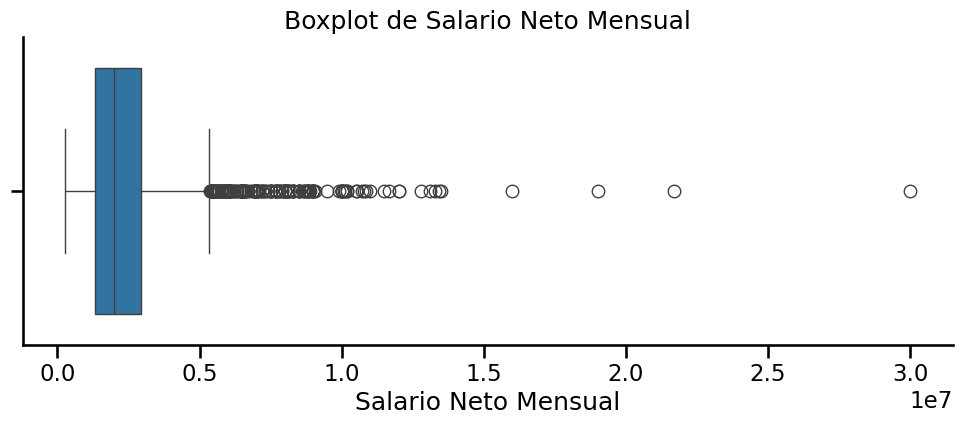

In [ ]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df1["salary_monthly_NETO"])
plt.title("Boxplot de Salario Neto Mensual")
plt.xlabel("Salario Neto Mensual")
seaborn.despine()

Del gráfico de caja anterior, podemos ver que si queremos que nuestro análisis alcance un buen grado de generalidad para la mayor cantidad de datos posibles, es conveniente ignorar aquellos datos ubicados en regiones de poca densidad de datos de la variable 'salario neto mensual'. Para ello, reajustamos el salario neto mensual máximo a considerar en 15.000.000.

In [ ]:
sal_neto_min = 254232
sal_neto_max = 15000000
df1= df[df['salary_monthly_NETO'] > sal_neto_min]
df1 = df1[df1['salary_monthly_NETO'] < sal_neto_max]
df1 = df1[df1['work_dedication'] == 'Full-Time']

print(f"Cantidad de datos originales: {len(df)}")
print(f"Cantidad de datos filtrados: {len(df1)}")
print(f"Datos descartados considerando salario mensual neto mínimo, salario mensual neto máximo y sólo dedicación full-time: {len(df) - len(df1)}")

Cantidad de datos originales: 5196
Cantidad de datos filtrados: 4688
Datos descartados considerando salario mensual neto mínimo, salario mensual neto máximo y sólo dedicación full-time: 508


Veamos algunas visualizaciones de los datos de "salario neto mensual" considerados hasta ahora:

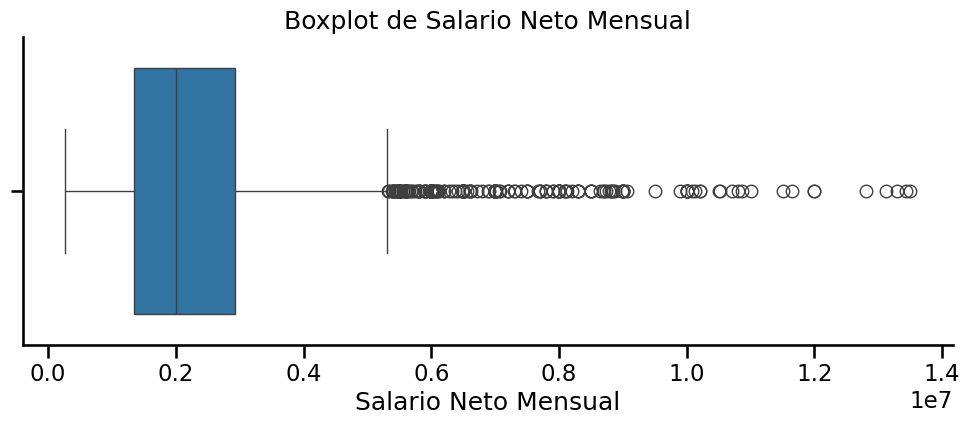

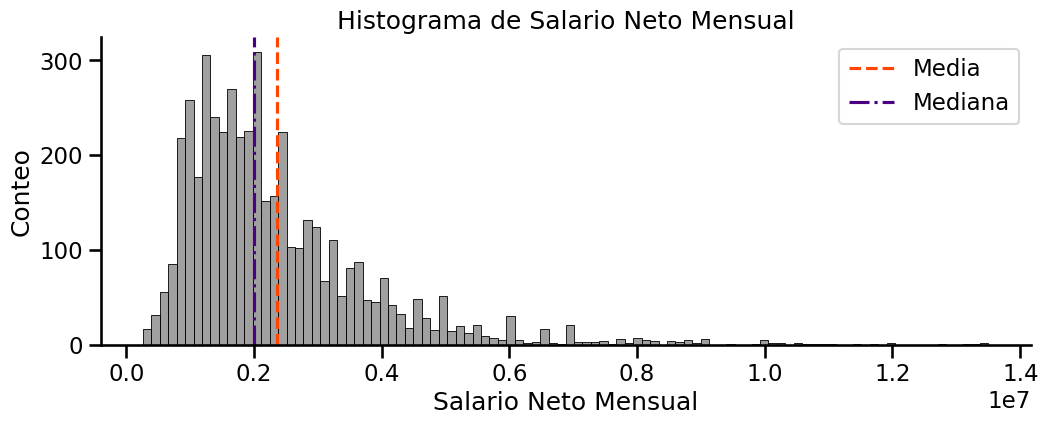

In [ ]:
#Gráfico boxplot
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df1["salary_monthly_NETO"])
seaborn.despine()
plt.title("Boxplot de Salario Neto Mensual")
plt.xlabel("Salario Neto Mensual")
plt.show()

#Histograma
plt.figure(figsize=(12, 4))
ax = seaborn.histplot(df1["salary_monthly_NETO"], bins=100, color='gray')
ax.axvline(df1["salary_monthly_NETO"].mean(), color='orangered',
            linestyle='--', label='Media')
ax.axvline(df1["salary_monthly_NETO"].median(), color='indigo',
            linestyle='-.', label='Mediana')
ax.legend()
seaborn.despine()
ax.set_title("Histograma de Salario Neto Mensual")
ax.set_xlabel("Salario Neto Mensual")
ax.set_ylabel("Conteo")
plt.show()

#Reacomodación de los datos

Reacomodamos los datos para poder estudiar cada lenguaje por separado. Además, procedemos a depurar aún más los datos. En primer lugar, descartamos los datos de aquellos encuestados que hayan respondido "Ninguno de los anteriores" en "tools_programming_languages".

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.replace('Ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df1.loc[:, 'cured_programming_languages'] = df1.tools_programming_languages\
    .apply(split_languages)

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df1_lang = df1.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df1[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.

if 'programming_language' not in relevant_columns:
    relevant_columns.append('programming_language')

df1_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_dedication
1,CSS,"CSS, HTML, Java, Javascript, SQL, TypeScript",10200000.0,Full-Time
1,HTML,"CSS, HTML, Java, Javascript, SQL, TypeScript",10200000.0,Full-Time
1,Java,"CSS, HTML, Java, Javascript, SQL, TypeScript",10200000.0,Full-Time
1,Javascript,"CSS, HTML, Java, Javascript, SQL, TypeScript",10200000.0,Full-Time
1,SQL,"CSS, HTML, Java, Javascript, SQL, TypeScript",10200000.0,Full-Time


Para decidir qué lenguajes utilizar, visualicemos primero cómo se distribuye la cantidad de usuarios por lenguaje.

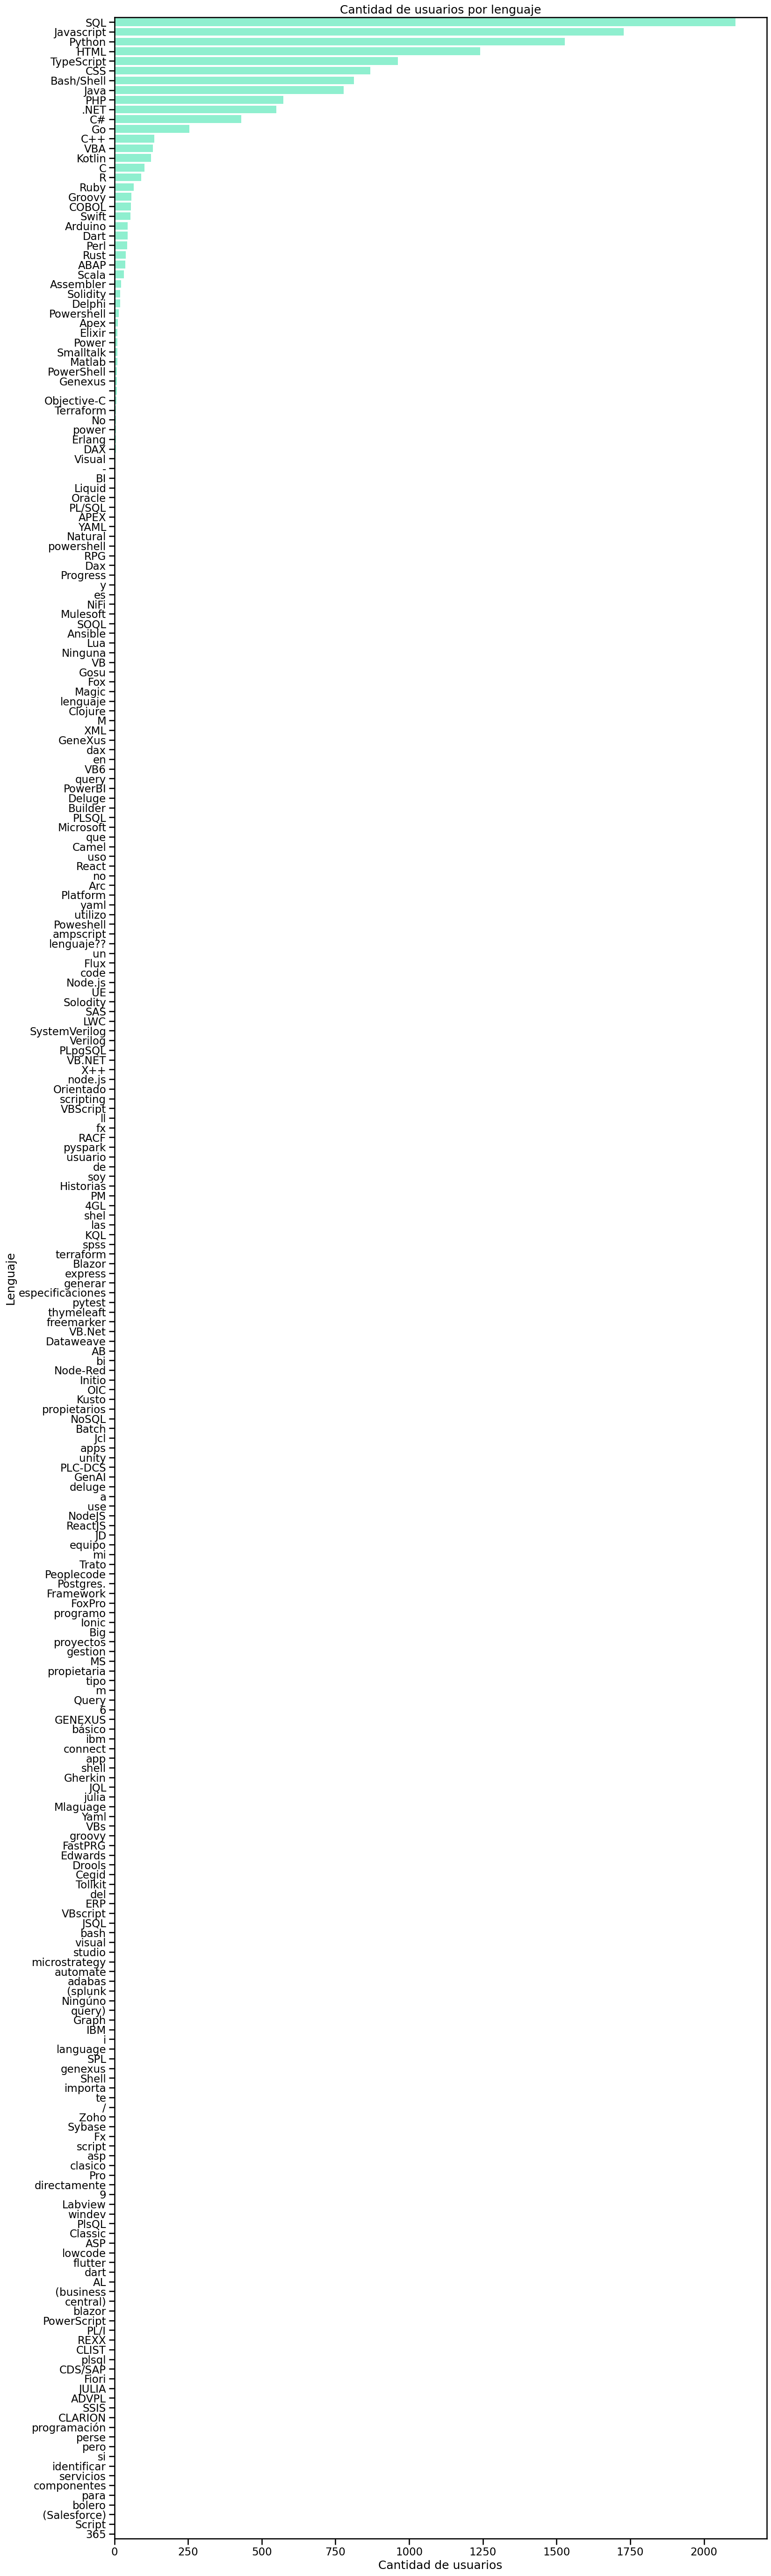

In [ ]:
plt.figure(figsize=(18,70))
seaborn.countplot(y=df1_lang['programming_language'], color ='aquamarine', order = df1_lang['programming_language'].value_counts().index)
#plt.tight_layout()
ax.tick_params(axis='y', labelsize=2)
#plt.tick_params(labelrotation=90)
plt.title('Cantidad de usuarios por lenguaje')
plt.xlabel('Cantidad de usuarios')
plt.ylabel('Lenguaje')
plt.show()

In [ ]:
# Filtramos por los top_n lenguajes más populares entre los encuestados
top_n = 17
top_languages = df1_lang['programming_language'].value_counts().nlargest(top_n).index

for i, language in enumerate(top_languages):
    df_language = df1_lang[df1_lang['programming_language']== language]
    print(f"{i+1} Lenguaje: {language}, cantidad de ocurrencias: {len(df_language)}")

1 Lenguaje: SQL, cantidad de ocurrencias: 2107
2 Lenguaje: Javascript, cantidad de ocurrencias: 1727
3 Lenguaje: Python, cantidad de ocurrencias: 1528
4 Lenguaje: HTML, cantidad de ocurrencias: 1241
5 Lenguaje: TypeScript, cantidad de ocurrencias: 961
6 Lenguaje: CSS, cantidad de ocurrencias: 869
7 Lenguaje: Bash/Shell, cantidad de ocurrencias: 812
8 Lenguaje: Java, cantidad de ocurrencias: 778
9 Lenguaje: PHP, cantidad de ocurrencias: 574
10 Lenguaje: .NET, cantidad de ocurrencias: 549
11 Lenguaje: C#, cantidad de ocurrencias: 431
12 Lenguaje: Go, cantidad de ocurrencias: 255
13 Lenguaje: C++, cantidad de ocurrencias: 136
14 Lenguaje: VBA, cantidad de ocurrencias: 131
15 Lenguaje: Kotlin, cantidad de ocurrencias: 124
16 Lenguaje: C, cantidad de ocurrencias: 102
17 Lenguaje: R, cantidad de ocurrencias: 91


Observamos dos cosas:
- Hay respuestas sin sentido, por lo que deben ser descartadas
- Muchos lenguajes tienen una cantidad de datos muy chica como para realizar un análisis estadístico adecuado. Decidimos proceder sólo con los lenguajes más populares entre los encuestados, quedándonos sólo con aquellos que cuenten con al menos 91 usuarios (es decir, hasta R inclusive).

In [ ]:
df1_top = df1_lang[df1_lang['programming_language'].isin(top_languages)]

print(f"Tenemos ahora {len(df1_top)} casos, habiendo descartado {len(df1_lang) - len(df1_top)} casos")

Tenemos ahora 12416 casos, habiendo descartado 935 casos


Además visualizamos la densidad de datos de salario mensual neto para cada lenguaje seleccionado provista por KDE. El color de la curva en el siguiente gráfico es más cálido cuanto mayor sea la popularidad del lenguaje.

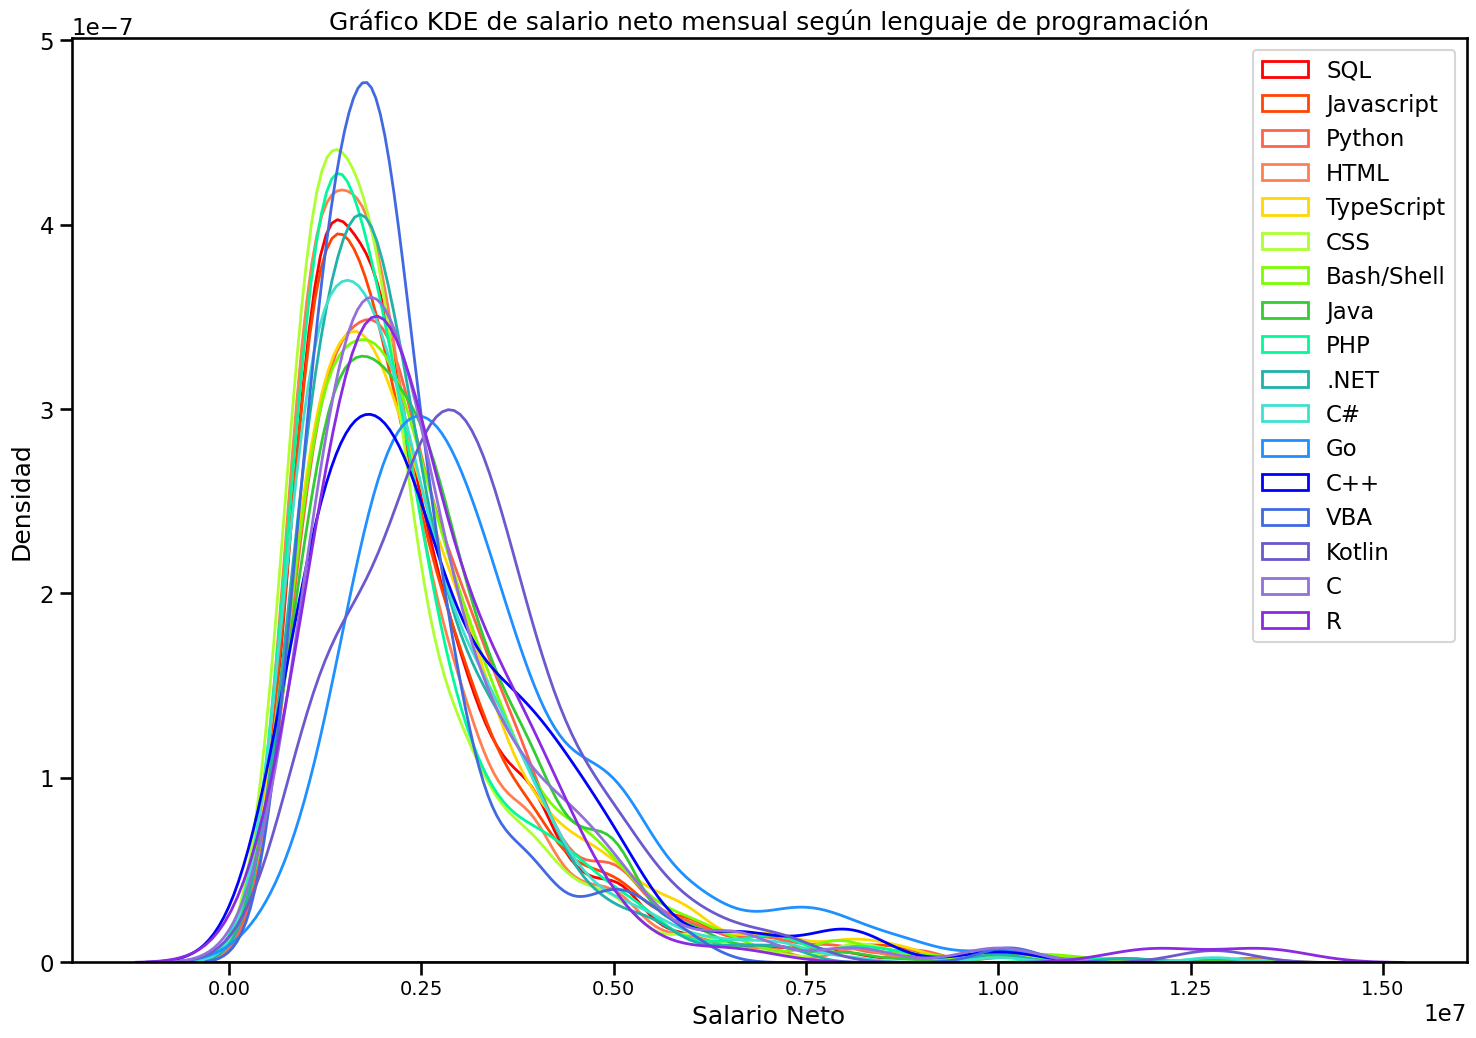

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(18,12))

# Paleta de 17 colores en orden arcoíris + tonos intermedios
paleta_arcoiris_17 = [
    # Rojos a Naranjas
    '#FF0000', '#FF4500', '#FF6347', '#FF7F50',
    # Amarillos a Verdes
    '#FFD700', '#ADFF2F', '#7CFC00', '#32CD32',
    # Verdes a Azules
    '#00FA9A', '#20B2AA', '#40E0D0', '#1E90FF',
    # Azules a Índigos
    '#0000FF', '#4169E1', '#6A5ACD',
    # Violetas a Púrpuras
    '#9370DB', '#8A2BE2', '#9400D3'
]

for i, language in enumerate(top_languages):
    df_language = df1_top[df1_top['programming_language']== language]
    seaborn.kdeplot(data = df_language, x = 'salary_monthly_NETO', linewidth=2, fill=True,  alpha=0, bw_adjust=0.8, label = language, color=paleta_arcoiris_17[i])
plt.xticks(fontsize=14)  # Achicamos la letra para que se vea mejor
plt.title("Gráfico KDE de salario neto mensual según lenguaje de programación")
plt.xlabel("Salario Neto")
plt.ylabel("Densidad")
plt.legend()
plt.show()
seaborn.despine()

# Resumen de los filtros usados para los datos a considerar:
- Salario neto mensual mayor al SMVM en julio de 2024
- Salario neto mensual mayor a 15.000.000$
- Dedicación full-time
- sólo los 17 lenguajes de programación más populares, para los cuales tenemos datos de ~100 usuarios o más

##3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas.

Para responder a la pregunta  **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**, analizamos cuánto mejora la probabilidad de cobrar en el último cuartil el trabajar con cada uno de los lenguajes estudiados.
Para ello, calculamos la probabilidad condicional de cobrar en el último cuartil dado que se trabaja cada uno de estos lenguajes.

In [ ]:
#Creo dataframe que almacenará los resultados del análisis de cada elnguaje
columnas = ['lenguaje', 'cantidad_de_usuarios', 'salario_neto_medio', 'salario_neto_mediana', 'proba_de_cobrar_en_q4']
df_lenguajes = pd.DataFrame(columns=columnas)

#Defino dataframe con los datos del último cuartil
q3 = df1_top['salary_monthly_NETO'].quantile(0.75)
df_ultimo_cuartil_sal_neto = df1_top[df1_top['salary_monthly_NETO'] >= q3]

#calculo probabilidad de cobrar en el último cuartil
proba_cobrar_en_ultimo_cuartil = len(df_ultimo_cuartil_sal_neto)/len(df1_top)
print(f"Probabilidad de cobrar en el último cuartil: {proba_cobrar_en_ultimo_cuartil}\n\n")

for language in top_languages:
    df_language = df1_top[df1_top['programming_language']== language]
    cantidad_de_usuarios = len(df_language)
    proba_lenguaje = cantidad_de_usuarios/len(df1_top)
    salario_medio_neto = df_language['salary_monthly_NETO'].mean()
    salario_neto_mediana = df_language['salary_monthly_NETO'].median()
    proba_ultimo_sal_cuartil_y_language = len(df_ultimo_cuartil_sal_neto[df_ultimo_cuartil_sal_neto["programming_language"] == language])/len(df1_top)
    proba_condicional_sal_ultimo_cuartil_si_lenguaje = proba_ultimo_sal_cuartil_y_language / proba_lenguaje
    nueva_fila = {'lenguaje': language, 'cantidad_de_usuarios': cantidad_de_usuarios, 'salario_neto_medio': salario_medio_neto, 'salario_neto_mediana': salario_neto_mediana, 'proba_de_cobrar_en_q4': proba_condicional_sal_ultimo_cuartil_si_lenguaje}
    df_lenguajes.loc[len(df_lenguajes)] = nueva_fila

#Reordenamos para ver de mayor prob de cobrar en el último cuartil a menor
df_lenguajes_ordenados = df_lenguajes.sort_values(by='proba_de_cobrar_en_q4', ascending=False)
print(df_lenguajes_ordenados)

Probabilidad de cobrar en el último cuartil: 0.26522229381443296


      lenguaje  cantidad_de_usuarios  salario_neto_medio  salario_neto_mediana  proba_de_cobrar_en_q4
11          Go                   255        3.348310e+06             2920000.0               0.486275
14      Kotlin                   124        3.075158e+06             2900000.0               0.483871
12         C++                   136        2.740706e+06             2275000.0               0.360294
4   TypeScript                   961        2.615711e+06             2200000.0               0.306972
7         Java                   778        2.549764e+06             2300000.0               0.303342
2       Python                  1528        2.597181e+06             2200000.0               0.302356
6   Bash/Shell                   812        2.598846e+06             2200000.0               0.299261
15           C                   102        2.599333e+06             2200000.0               0.284314
16           R 

Al comparar la probabilidad de percibir un salario en el último cuartil dentro de todos los lenguajes seleccionados, se observa que los primeros nueve lenguajes analizados presentan una mayor proporción de personas en ese rango salarial. Entre ellos se destacan C++, TypeScript (que requiere conocimientos de JavaScript), Java, Python y C, los cuales son lenguajes ampliamente difundidos y desarrollados.

Estos lenguajes suelen vincularse con tareas de mayor complejidad técnica o mayor impacto económico, como el desarrollo de sistemas distribuidos, backend a gran escala, programación de bajo nivel o ciencia de datos. Esta relación puede explicarse por diversos factores:

* Go es ampliamente utilizado en arquitecturas de microservicios por su eficiencia y manejo de concurrencia.

* Kotlin es el lenguaje preferido para el desarrollo de aplicaciones Android modernas.

* Python lidera en campos como ciencia de datos, inteligencia artificial y automatización, y cuenta con una gran variedad de bibliotecas especializadas como NumPy, Pandas, Seaborn, Matplotlib, PyTorch y Keras. Además, permite gestionar bases de datos de manera eficiente con conocimientos mínimos (o nulos) de SQL.

* C y C++ siguen siendo fundamentales en aplicaciones de alto rendimiento, programación embebida y sistemas críticos.

La popularidad y madurez de estos lenguajes ha dado lugar a ecosistemas sólidos, con abundante documentación, herramientas y comunidades activas, lo que los convierte en recursos altamente valorados y versátiles en el mercado laboral.

En contraste, otros lenguajes como C#, JavaScript, .NET, SQL, PHP, HTML, CSS y VBA tienden a ubicarse en el rango salarial inferior. Si bien son esenciales en múltiples contextos —como desarrollo web, automatización o bases de datos—, su aprendizaje es, en muchos casos, más accesible, y existe una mayor saturación de perfiles con experiencia en estos lenguajes. Esto reduce, en promedio, la mediana salarial observada.

Es importante destacar que esta diferencia no implica que unos lenguajes sean inherentemente "mejores" que otros, sino que refleja una combinación de factores como la oferta de profesionales, la demanda específica en la industria y el tipo de proyectos que cada lenguaje suele abordar.

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




Como variables numéricas elegimos:
- 'salary_monthly_NETO'
- 'profile_age'
- 'salary_satisfaction'

Como variables categóricas elegimos:
- 'profile_gender'
- 'work_province'

In [ ]:

df_DC = df[['salary_monthly_NETO', 'profile_age', 'salary_satisfaction', 'profile_gender', 'work_province']]
df_DC = df_DC.dropna() # Elimino los nans
df_DC = df_DC[df_DC['salary_monthly_NETO'] > sal_neto_min]
df_DC = df_DC[df_DC['salary_monthly_NETO'] < sal_neto_max]
df_DC = df_DC[df_DC['profile_age'] > 0]
df_DC = df_DC[df_DC['profile_age'] < 70]
df_DC.loc[:,'profile_gender'] = df_DC.profile_gender.replace({'Varón Cis': 'Varón cis','Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis','Trans': 'Diversidades','Lesbiana':'Diversidades', 'Agénero': 'Diversidades' , 'Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades'}).fillna(False)

In [ ]:
salary_col = 'salary_monthly_NETO'

Para un primer vistazo a las columnas elegidas creemos que se puede obtener cierta noción de la distribución de los datos comenzando nuestro acercamiento con un histograma. En este caso creemos que tanto de una variable categórica (género) como de una numérica (salario neto) este tipo de gráficos nos puede ayudar a tener un pantallazo.

<ipython-input-23-a311edbc0018>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(x=genero_counts.index, y=genero_counts.values, palette='pastel', edgecolor='black')


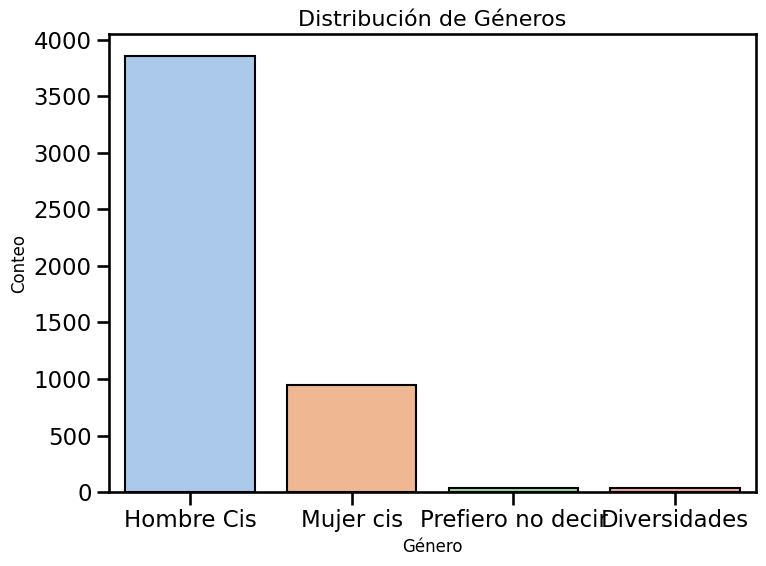

In [ ]:
genero_counts = df_DC['profile_gender'].value_counts()

plt.figure(figsize=(8, 6))
seaborn.barplot(x=genero_counts.index, y=genero_counts.values, palette='pastel', edgecolor='black')

plt.title('Distribución de Géneros', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Conteo', fontsize=12)

plt.tight_layout()
plt.show()

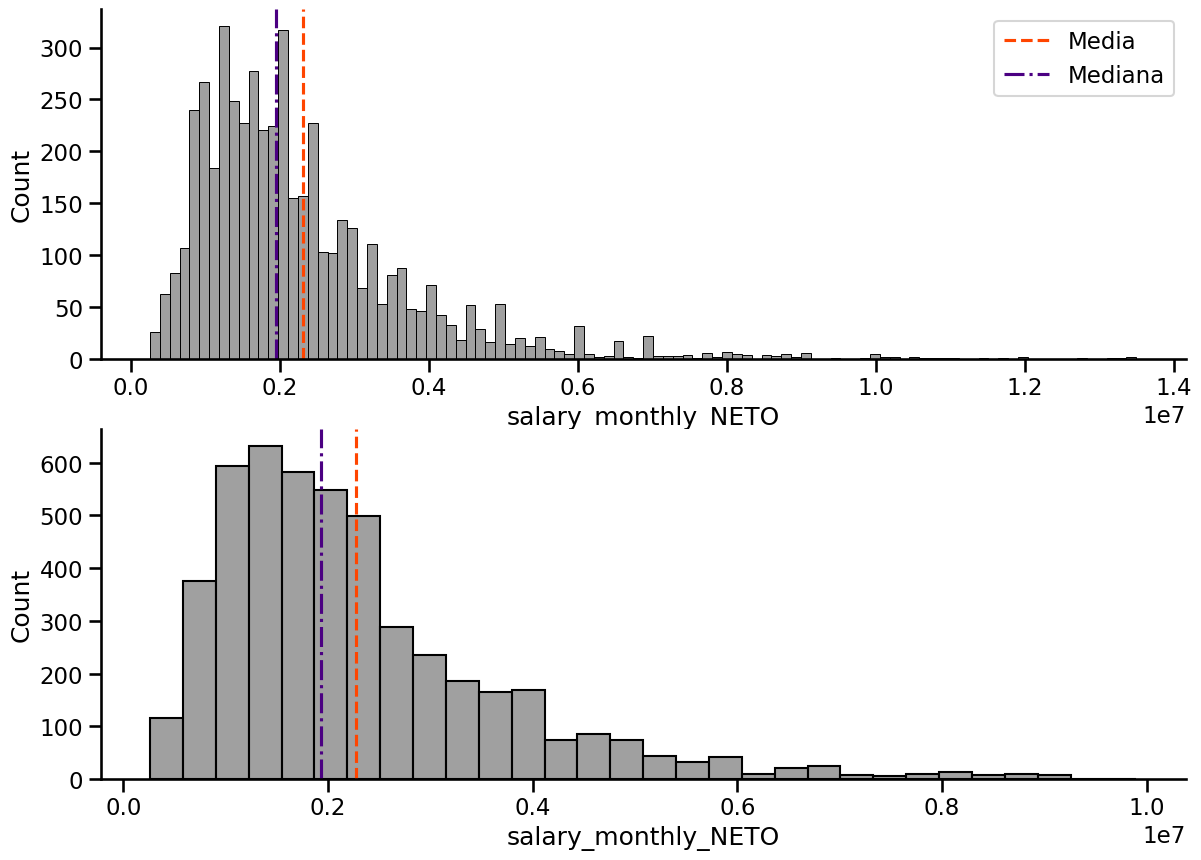

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(14, 10))

seaborn.histplot(df_DC[salary_col], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df_DC[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df_DC[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

filtered_df = df_DC[df_DC[salary_col] < 10000000]
seaborn.histplot(filtered_df[salary_col], bins=30, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

Pero en caso de que querramos elaborar un análisis más profundo o respondernos preguntas más específicas, como por ejemplo: ¿Cómo se distribuye el salario neto mensual según la provincia de trabajo y el género? o ¿Cómo se distribuye la satisfacción laboral según la edad y el género?, podemos utilizar gráficos relacionando estas variables.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


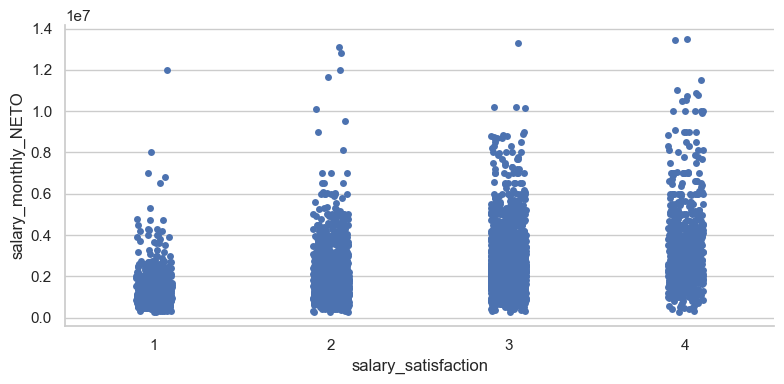

In [ ]:
seaborn.catplot(data=df_DC[df_DC.salary_monthly_NETO <= sal_neto_max], y='salary_monthly_NETO',
                x='salary_satisfaction', height=4, aspect=2)

En el gráfico de arriba se puede observar que hay más gente con salarios altos que tienen una alta satisfacción salarial (como era de esperarse).
También podríamos agregar que si bien 'salary_satisfaction' es una variable numérica, al no ser continua, estar muy acotada y ser equivalente a "nivel de satisfacción: muy bajo, bajo, medio, alto, muy alto" puede ser modelada como una variable categórica.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


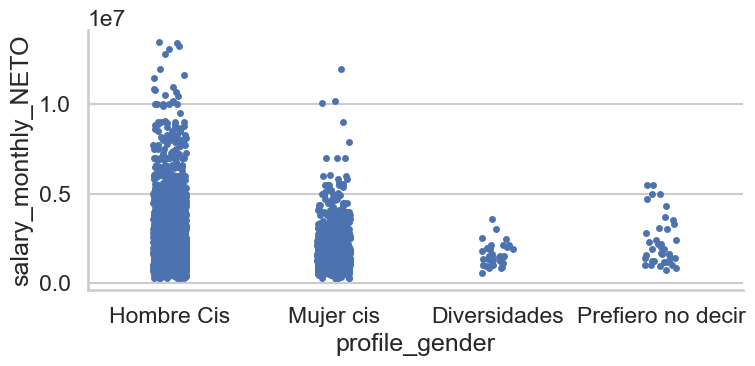

In [ ]:
seaborn.catplot(data=df_DC[df_DC.salary_monthly_NETO <= sal_neto_max], y='salary_monthly_NETO',
                x='profile_gender', height=4, aspect=2)

Con un simple vistazo a este gráfico podemos decir que al haber más hombres cis entre los que ganan un salario alto y que de la población estudiada no hay diversidades con un salario neto mensual medio o alto, existe una desigualdad salarial entre géneros. Esto puede ser un indicio de que el género influye en la satisfacción laboral y en el salario neto mensual, pero no podemos concluirlo sin un análisis más profundo.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


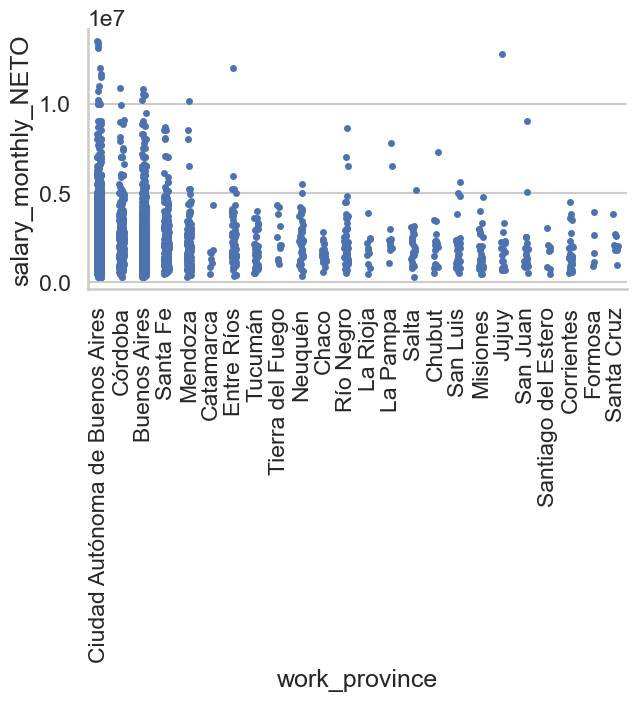

In [ ]:
plot = seaborn.catplot(data=df_DC[df_DC.salary_monthly_NETO <= sal_neto_max], y='salary_monthly_NETO',  #probar también con profile_age, 'profile_gender'
                x='work_province', height=4, aspect=2)
# Rotar las etiquetas del eje x
plot.set_xticklabels(rotation=90)

Y observando este gráfico podemos ver que la mayoria de los encuestados son de Buenos Aires (como era de esperarse) pero al ser trabajos en los cuales se es muy comun trabajar de forma remota nos llamó la atención la falta de salarios altos en otras provincias. Esto puede ser un indicio de que el lugar de trabajo y/o la modalidad influyen en el salario neto mensual, pero no podemos concluirlo sin un análisis más profundo.

Lo bueno de este tipo de gráficos es que con un simple vistazo nos permite acercarnos a algunas conclusiones pero también disparan muchas preguntas que pueden ser respondidas con un análisis más profundo.

A continuación, se presentan algunos gráficos que muestran la relación entre las variables elegidas. En estos gráficos, se puede observar cómo se distribuyen los datos y si existen patrones o asociaciones entre las variables.
Con un mapa de calor podemos observar la relacion entre 'salary_satisfaction' y 'profile_age'. En este caso nos permite visualizar rapidamente que es en la franja de edad entre los 30 y 40 años donde se encuentran un poco más satisfechos con su salario pero no del todo.

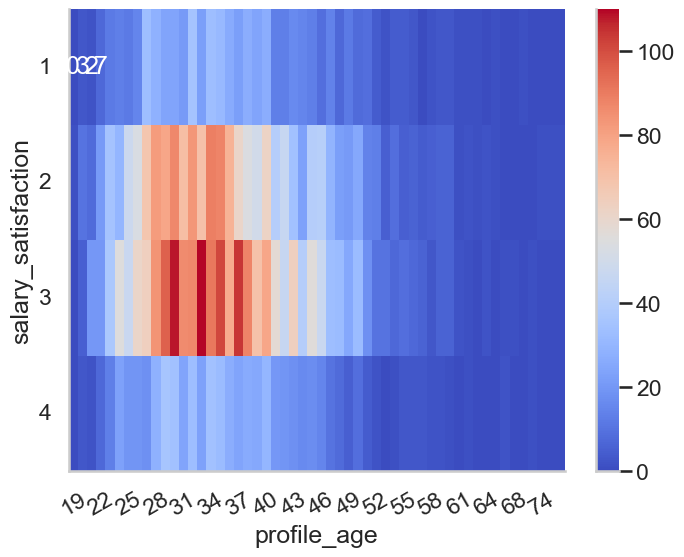

In [ ]:
fig = plt.figure(figsize=(8, 6))

exp = pd.crosstab(df_DC.salary_satisfaction, df_DC.profile_age)

seaborn.heatmap(exp, annot=True, fmt='g', cmap='coolwarm')

plt.xticks(rotation=30)
plt.yticks(rotation=0)

seaborn.despine()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x400 with 0 Axes>

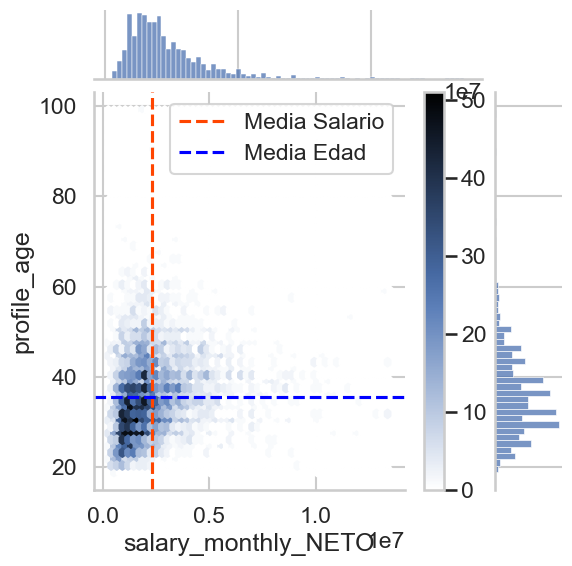

In [ ]:
fig = plt.figure(figsize=(8,4))
seaborn.jointplot(data=df_DC[df_DC.salary_monthly_NETO <= sal_neto_max], x='salary_monthly_NETO',
                  y='profile_age', kind='hex', height=6)
plt.axvline(df_DC[df_DC.salary_monthly_NETO <= sal_neto_max]['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media Salario')
plt.axhline(df_DC[df_DC.salary_monthly_NETO <= sal_neto_max]['profile_age'].mean(), color='blue',
            linestyle='--', label='Media Edad')
plt.legend()
plt.colorbar()
# Remove scietific notation
plt.ticklabel_format(style='plain', axis='y')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

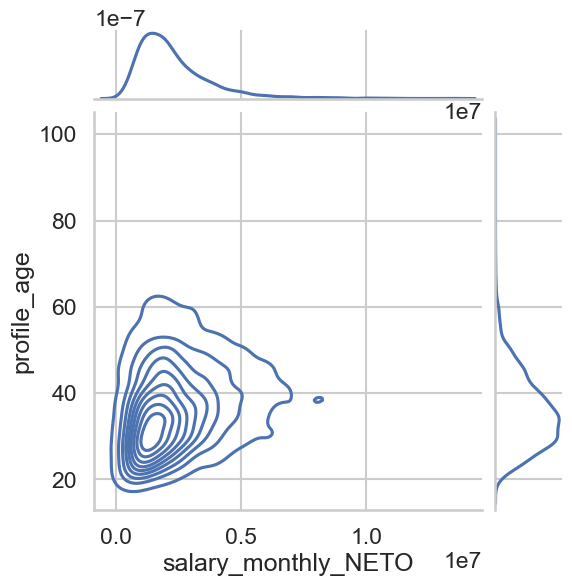

In [ ]:
seaborn.jointplot(data=df_DC[df_DC.salary_monthly_NETO <= sal_neto_max], x='salary_monthly_NETO',
                  y='profile_age', kind='kde', height=6)
# Remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

Con estos dos últimos gráficos podemos observar que no hay mucha cantidad de personas entre 50 y 60 años con salarios netos mensuales altos y que hay un gran cúmulo de personas en sus 20s con salarios netos mensuales bajos para el sector (es esperable ya que son personas que recién comienzan su carrera profesional). Esto puede ser un indicio de que la edad influye en el salario neto mensual y que hay cierto techo salarial para aquellos que tienen entre 50 y 60 años, pero no podemos concluirlo sin un análisis más profundo.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



Veamos qué relación podemos encontrar entre los datos de salario neto mensual y salario bruto mensual. Filtramos los datos se salario neto y bruto con los mismos límites vistos arriba.

In [ ]:
sal_max = 15000000
sal_min = 254232
df1= df[df['salary_monthly_NETO'] < sal_max]
df1= df1[df1['salary_monthly_NETO'] > sal_min]

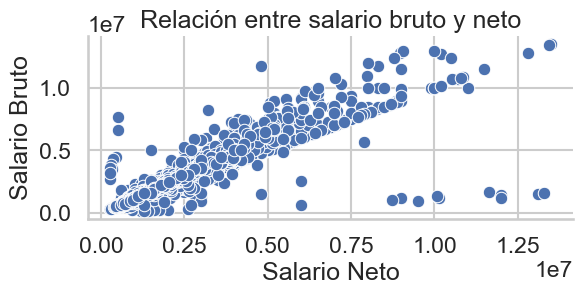

In [ ]:
seaborn.pairplot(data=df1,
                 y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=3)
plt.title('Relación entre salario bruto y neto')
plt.xlabel("Salario Neto")
plt.ylabel("Salario Bruto")
plt.show()

In [ ]:
correlacion = df1['salary_monthly_NETO'].corr(df1['salary_monthly_BRUTO'])
print(correlacion)

0.9129031956782989


Vemos que hay una fuerte correlación entre el salario bruto y neto. Esperamos siempre que el salario bruto sea mayor al salario neto, sin embargo encontramos muchos casos en los que esto no es así. Esto último puede deberse a la mala o nula educación financiera de los encuestados

Se puede sacar la pregunta por el salario bruto, sin embargo, hay que tener en consideración:
- que en el caso de los trabajadores informales el salario neto sea el único parámetro de ingreso mensual a considerar, pero para monotributistas o trabajadores formales en relación de dependencia es necesario especificar bien que el salario neto corresponde al remanente una vez se les haya realizado los descuentos.
- Que para complementar la información que se pierde al no poder comparar salario neto con bruto, es necesario tener un campo que especifique la condición del trabajador (informal, formal en relación de dependencia o monotributista). De ser posible puede consultarse por el monto de los descuentos.

## c) Densidad condicional

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






Veamos primero cuales son los perfiles de estudios registrados en la encuesta

In [ ]:
# Elegimos el data frame con el que se trabajo anteriormente
df1.profile_studies_level.describe()

count              2340
unique                7
top       Universitario
freq               1545
Name: profile_studies_level, dtype: object

In [ ]:
df1.profile_studies_level.unique()

array([nan, 'Universitario', 'Secundario', 'Maestría', 'Doctorado',
       'Terciario', 'Posgrado/Especialización', 'Posdoctorado'],
      dtype=object)

In [ ]:
porcentajes = df1.profile_studies_level.value_counts(normalize=True, dropna=True) * 100
print(porcentajes)

profile_studies_level
Universitario               66.025641
Terciario                   17.307692
Posgrado/Especialización     6.324786
Maestría                     4.914530
Secundario                   3.974359
Doctorado                    0.940171
Posdoctorado                 0.512821
Name: proportion, dtype: float64


Ahora vemos cuales son los perfiles que presentan mayor cantidad de encuestados

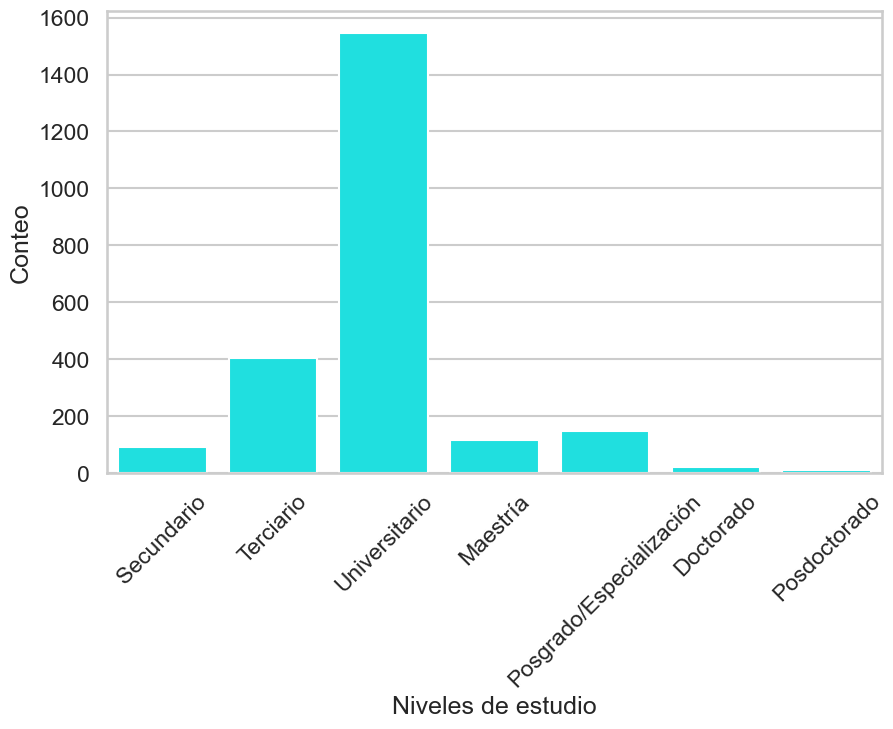

In [ ]:
sorted_studies_levels = ['Secundario', 'Terciario', 'Universitario','Maestría','Posgrado/Especialización', 'Doctorado', 'Posdoctorado']
fig = plt.figure(figsize=(10,6))
seaborn.countplot(x= df1.profile_studies_level.dropna(), color='cyan', order=sorted_studies_levels)
plt.tick_params(axis='x', labelrotation=45)
plt.xlabel('Niveles de estudio')
plt.ylabel('Conteo')
plt.show()

Podemos observar que los estudios Universitarios, seguido de los terciarios, son las dos subpoblaciones más numerosas. Luego, construydo dos data frame que contengan las encuestas de los Universitarios y los estudios Terciarios.  

In [ ]:
# Construyo un data frame que sea solo los que tiene un estudio terciario
df2 = df1.query("profile_studies_level == 'Terciario'")
# Construyo un data frame que sea solo los que tiene un estudio Universitarios
df3 = df1.query("profile_studies_level == 'Universitario'")

Luego, realizo dos graficos de barras para comparar ambos subgrupos con respecto el salario mensual neto.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


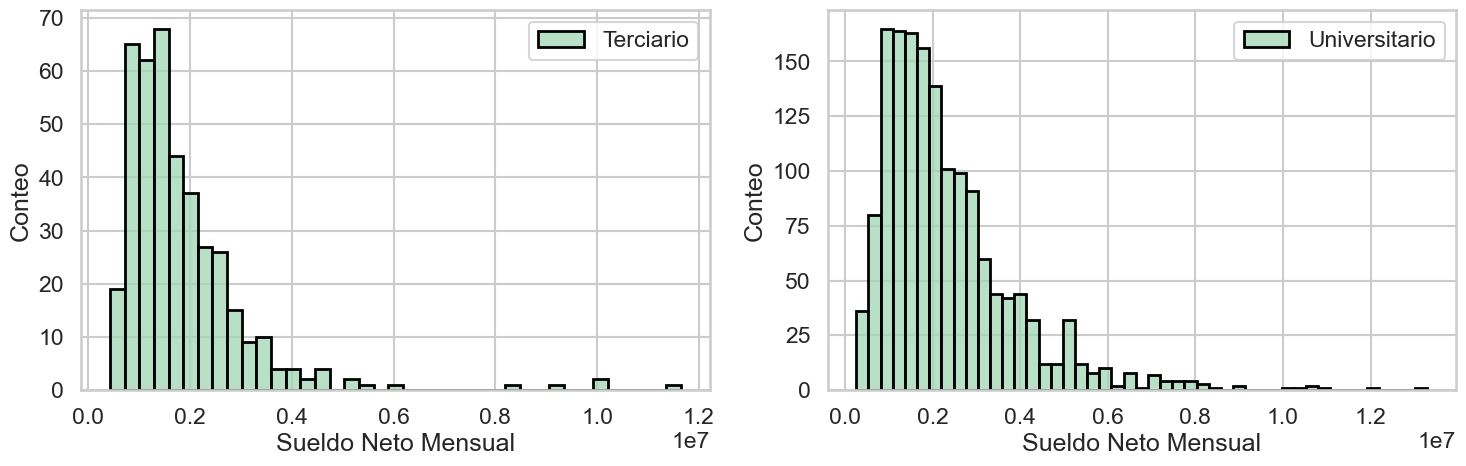

In [ ]:
salary_month_02 = df2['salary_monthly_NETO'].dropna()
salary_month_03 = df3['salary_monthly_NETO'].dropna()

# Realizo los graficos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))#, sharey='row')

# Primer gráfico
seaborn.histplot(
    salary_month_02,
    ax=ax[0],
    kde=False,
    color="#A0D6B4",
    edgecolor="black",
    linewidth=2,
    label="Terciario"
    )
ax[0].legend()
ax[0].set_xlabel("Sueldo Neto Mensual")
ax[0].set_ylabel("Conteo")

# Segundo gráfico
seaborn.histplot(
    salary_month_03,
    ax=ax[1],
    kde=False,
    color="#A0D6B4",
    edgecolor="black",
    linewidth=2,
    label="Universitario"
    )

ax[1].legend()
ax[1].set_xlabel("Sueldo Neto Mensual")
ax[1].set_ylabel("Conteo")

plt.tight_layout()
plt.show()

Veamos ahora una superposicion de ambos gráficos

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


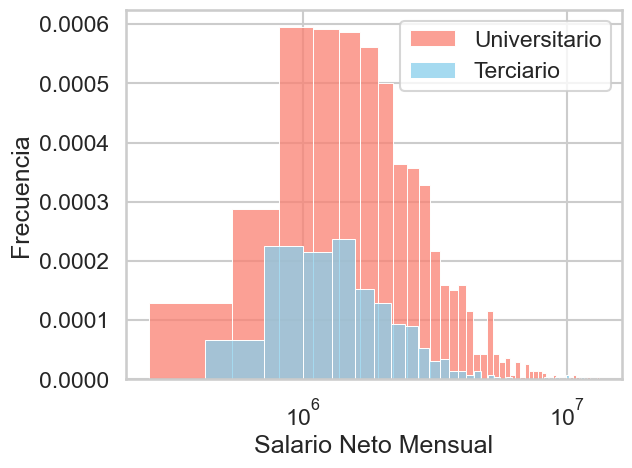

In [ ]:
seaborn.histplot(
    data=df1[df1['profile_studies_level'] == 'Universitario']['salary_monthly_NETO'],
    kde=False,
    color='salmon',
    label='Universitario',
    stat='frequency'
    )
seaborn.histplot(
    data=df1[df1['profile_studies_level'] == 'Terciario']['salary_monthly_NETO'],
    kde=False,
    color='skyblue',
    label='Terciario',
    stat='frequency'
    )
plt.legend()
plt.xlabel('Salario Neto Mensual')
plt.ylabel('Frecuencia')
plt.xscale('log')
plt.show()

Aqui podemos observar que los histogramas son diferentes en la magnitud de la frecuencia, pero presentan una misma "forma" en la densida de la distribución de probabilidad. Esto puede hacernos sospechar que los datos están correlacionados, por lo que podemos analizar si ambas variables son independientes. Para una primera inspección podemos utilizar la definición probabilidad condicional
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$
y el resultado de dos probabilidades independientes
$$P(A \cap B) = P(A)P(B)$$

In [ ]:
# Calculo las probabilidades A y B
# P(A): Probabilidad de los Terciarios en el espacio muestral universal
# P(B): Probabilidad de los Universitarios en el espacio muestral universal
# Probabilidades individuales
prob_02=len(df2['salary_monthly_NETO'])/len(df1['salary_monthly_NETO'])
prob_03=len(df3['salary_monthly_NETO'])/len(df1['salary_monthly_NETO'])
# Probabilidad conjunta
df4 = df1.query(f"(profile_studies_level == 'Terciario') & (profile_studies_level == 'Universitario')")
prob_04 = len(df4['salary_monthly_NETO'])/len(df1['salary_monthly_NETO'])
# Imprimo
print("P(A):",'%5.2f' % prob_02)
print("P(B):",'%5.2f' % prob_03)
print("P(A ∩ B):",'%5.2f' % prob_04)

P(A):  0.08
P(B):  0.32
P(A ∩ B):  0.00


La probabilidad conjunta es nula porque A y B son disjuntos, por lo que no son independientes. En particular, todas las categorías de niveles de estudios son mutuamente excluyentes, por lo que todas serán dependientes. Quizas hubiese sido más ilustrativo haber propuesto otro tipo de categoria para analizar la dependencia, tal como el ejemplo dado en clase (probabilidad de cobrar más que la media, si la experiencia es mayor a 5 años).
Veamos ahora que otras medida de interés.

In [ ]:
# medidas de centralización y dispersión del data frame completo
mean_salary = df1['salary_monthly_NETO'].mean()
median_salary = df1['salary_monthly_NETO'].median()
std_salary = df1['salary_monthly_NETO'].std()
print(f"Salario medio:",'%5.2f' % mean_salary)
print(f"mediana:",'%5.2f' % median_salary)
print(f"Desviacion estandar:",'%5.2f' % std_salary)

Salario medio: 2318037.54
mediana: 1943842.00
Desviacion estandar: 1542864.22


Por último, calculo las medidas de centralización y dispersión para cada subploblación

In [ ]:
niveles = ['Terciario', 'Universitario']
for nivel in niveles:
    sueldos = df1[df1['profile_studies_level'] == nivel]['salary_monthly_NETO'].dropna()
    print(f"\n--- {nivel} ---")
    print(f"Media: {sueldos.mean():,.0f}")
    print(f"Mediana: {sueldos.median():,.0f}")
    print(f"Desvío estándar: {sueldos.std():,.0f}")


--- Terciario ---
Media: 1,854,370
Mediana: 1,500,000
Desvío estándar: 1,286,223

--- Universitario ---
Media: 2,327,061
Mediana: 1,950,000
Desvío estándar: 1,540,390


Podemos observar que la media, la mediana y la desviacion estandar del salario con respecto a toda la muestra total es similar a los valores dados por los estudios universitarios. Sin embargo, para los estudios terciarios, se encuentran levemente por debajo.
Una conclusion esperada, es pensar que se tiene mejores salarios cuando el titulo es universitario, frente al terciario.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica.
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


Se seleccionaron las variables de **edad, género y salario mensual neto** para explorar su relación y detectar posibles patrones. Se filtraron los datos considerando edades dentro de la vida laboral activa (entre los 18 y 65 años) y se acotaron los rangos salariales a intervalos razonables, con el fin de reducir la influencia de casos atípicos, tal como se mencionó arriba.

Decidimos agrupar las idendidades LGBT+ en una sola categoría para facilitar la visualización de los gráficos.

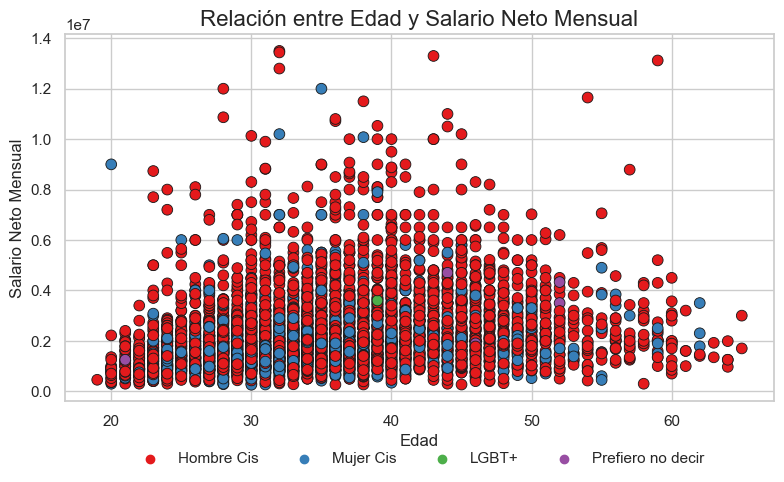

In [ ]:
# Filtrar columnas relevantes y eliminar nulos
df_plot = df1[['profile_age', 'salary_monthly_NETO', 'profile_gender']].dropna()

# identidades LGBT+
identidades_lgbt = ['No binarie', 'Trans', 'Queer', 'Lesbiana', 'Agénero']


df_plot['genero_agrupado'] = df_plot['profile_gender'].apply(
    lambda x: 'LGBT+' if x in identidades_lgbt else x
)


# Filtramos valores extremos o inválidos. El filtro del salario neto ya está considerado en df1
df_filtrado = df_plot[
    df_plot['profile_age'].between(18, 65)
]


# Estilo visual
seaborn.set(style='whitegrid')

# Gráfico scatterplot
plt.figure(figsize=(8, 5))
seaborn.scatterplot(
    data=df_filtrado,
    x='profile_age',
    y='salary_monthly_NETO',
    hue='genero_agrupado',
    palette='Set1',
    edgecolor='k',
    s=60
)

plt.title('Relación entre Edad y Salario Neto Mensual', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Salario Neto Mensual', fontsize=12)
plt.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc='upper center',
    ncol=4,
    frameon=False
)


plt.tight_layout()
plt.show()

Después hicimos dos gráficos similares al anterior, pero acotando los salarios. En el gráfico de la izquierda se muestran los sueldos entre 200 mil y 2 millones, y en el de la derecha los que ganan entre 2.4 y 14 millones.

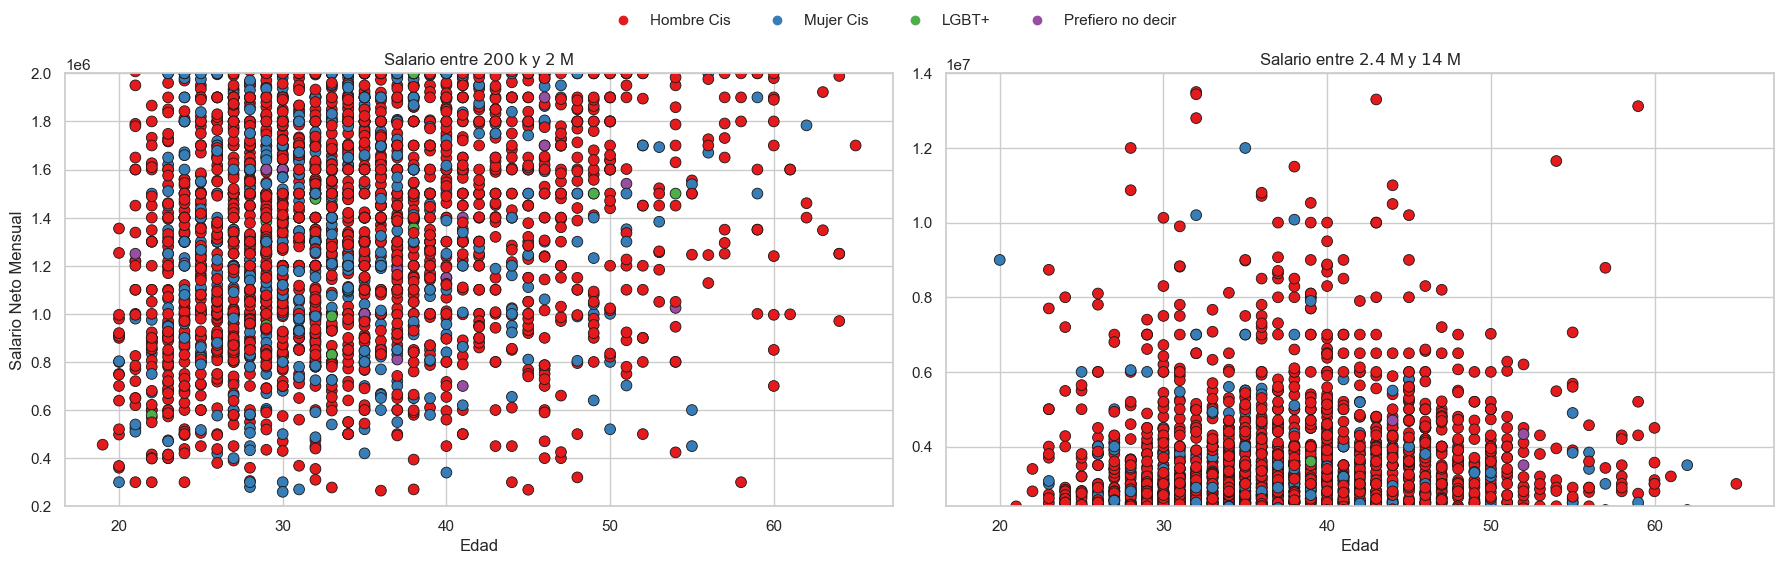

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=False)
seaborn.set(style='whitegrid')

# Primer gráfico (izquierda)
seaborn.scatterplot(
    data=df_filtrado,
    x='profile_age',
    y='salary_monthly_NETO',
    hue='genero_agrupado',
    palette='Set1',
    edgecolor='k',
    s=60,
    ax=ax[0],
    legend=True
)
ax[0].set_title('Salario entre $200$ k y $2$ M')
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Salario Neto Mensual')
ax[0].set_ylim(2E5, 2E6)

# Segundo gráfico (derecja)
seaborn.scatterplot(
    data=df_filtrado,
    x='profile_age',
    y='salary_monthly_NETO',
    hue='genero_agrupado',
    palette='Set1',
    edgecolor='k',
    s=60,
    ax=ax[1],
    legend=False
)
ax[1].set_title('Salario entre $2.4$ M y $14$ M')
ax[1].set_xlabel('Edad')
ax[1].set_ylabel('')
ax[1].set_ylim(24E5, 14E6)

handles, labels = ax[0].get_legend_handles_labels()  # generamos una leyenda a partir del ax[0]
fig.legend(handles, labels, loc='upper center', ncol=4, frameon=False)

ax[0].legend_.remove()

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

In [ ]:
# Calcular el porcentaje de cada grupo de género
porcentajes_genero = df_filtrado['genero_agrupado'].value_counts(normalize=True) * 100

for genero, valor in porcentajes_genero.round(2).items():
    print(f"{genero}: {valor}%")

Hombre Cis: 79.03%
Mujer Cis: 19.43%
Prefiero no decir: 0.8%
LGBT+: 0.74%


Los gráficos muestran una mayor concentración de casos entre los 25 y 45 años, una franja etaria que suele coincidir con el mayor desarrollo profesional y actividad laboral. A partir de los 50, disminuye tanto la cantidad de datos como los niveles salariales, aunque hay algunas excepciones con ingresos elevados. La mayoría de los sueldos se ubican entre los 300 mil y 600 mil pesos, y los que superan los 8 millones son muy pocos, probablemente correspondientes a cargos jerárquicos o casos atípicos.

En relación al género, los datos muestran que el 79,03% de las personas encuestadas son hombres cis, el 19,43% mujeres cis, un 0,8% prefirió no declarar su género y un 0,74% se identificó dentro del grupo LGBT+. Esta composición ya anticipa una fuerte sobrerrepresentación de varones cis, tanto en cantidad como en los tramos más altos de ingresos. Las mujeres cis aparecen en menor proporción y no figuran en los extremos de mayores ingresos. Por su parte, las personas LGBT+ y quienes optaron por no declarar su género están poco representadas, lo que podría deberse tanto a su baja presencia en la muestra como a una menor participación en los niveles más altos de salario. También se observa una mayor diversidad de género entre los 25 y 35 años, mientras que en edades más avanzadas la presencia masculina cis es dominante.

Estos resultados permiten plantear algunas interpretaciones. Por ejemplo, la caída de ingresos en edades mayores podría estar vinculada a transiciones hacia la jubilación o a cambios de rol dentro del mercado laboral. La sobrerrepresentación de hombres cis en los tramos altos podría reflejar desigualdades en el acceso a mejores posiciones. La escasa presencia de mujeres cis y personas LGBT+ en esos niveles puede ser un indicio de barreras persistentes. Por último, la mayor diversidad en edades jóvenes podría ser una señal alentadora de mayor inclusión, aunque aún no se traduce en igualdad en los ingresos.

En líneas generales, las conclusiones coinciden con lo que uno podría esperar: una mayoría de hombres cis tanto en cantidad como en ingresos, mientras que otros géneros aparecen menos representados, especialmente en los tramos más altos.

